In [1]:
import numpy as np
from fcm import FCM
from kfcm import KFCM
from vkfcm import VKFCM

# Teste
from sklearn.datasets import load_iris
# Plot
import matplotlib.pyplot as plt
# Rand Index
from sklearn.metrics import adjusted_rand_score

### Dataset de teste, com 3 Classes

In [2]:
iris_dataset = load_iris()
X = iris_dataset.data
y = iris_dataset.target

### Achando os clusters em FCM

In [3]:
cluster_alg = VKFCM(X, 3, m=2)

for i in range(100):
    cluster_alg.update_centroids()
    cluster_alg.update_weights()
    cluster_alg.update_membership()
    
centroids = cluster_alg.centroids
data = cluster_alg.data
colors = cluster_alg.U

In [4]:
cluster_alg.centroids[0, 0]

5.195331030271548

In [5]:
def plot_membership(c_X, c_y, X, y, colors):
    # points
    plt.scatter(X, y, c=colors)

    # centroids
    for cX, cY in zip(c_X, c_y):
        plt.scatter(cX, cY, c='black', marker='s')

In [6]:
def plot_one_membership(c_X, c_y, X, y, colors, centroid):
    new_colors = np.zeros(colors.shape)
    new_colors[:, centroid] = colors[:, centroid]

    plot_membership(centroids[:, 0], centroids[:, 1], data[:, 0], data[:, 1], new_colors)

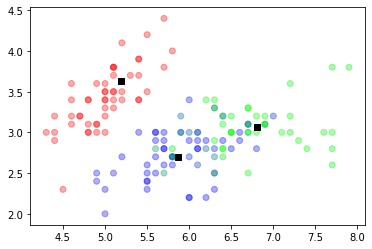

In [7]:
# membership!!!
plot_membership(centroids[:, 0], centroids[:, 1], data[:, 0], data[:, 1], colors)

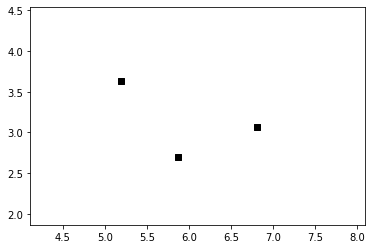

In [8]:
plot_one_membership(centroids[:, 0], centroids[:, 1], data[:, 0], data[:, 1], colors, 0)

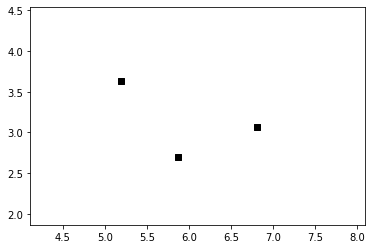

In [9]:
plot_one_membership(centroids[:, 0], centroids[:, 1], data[:, 0], data[:, 1], colors, 1)

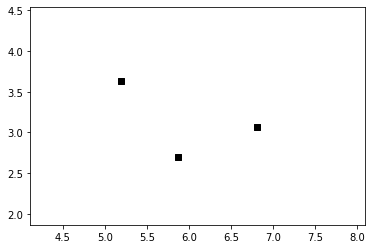

In [10]:
plot_one_membership(centroids[:, 0], centroids[:, 1], data[:, 0], data[:, 1], colors, 2)

### Rand index

In [11]:
y_pred = cluster_alg.predict(X)

In [12]:
adjusted_rand_score(y, y_pred)

0.8345340129274751

In [13]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])